<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

IndexError: index 0 is out of bounds for axis 0 with size 0

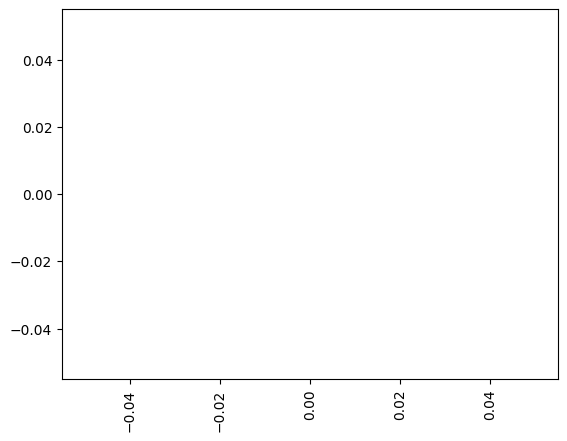

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the data directory
df = pd.read_csv("../data/kepler_exoplanet_data.csv")

# Display the first few rows to get a quick look at the data
df.head()

# Show dataset structure: number of rows, columns, and data types
df.info()

# Identify missing values in each column
df = df.dropna()
missing = df.isnull().sum()


# Filter to show only columns that have missing values
print(missing[missing > 0])

# Display names of columns that are non-numeric
df.select_dtypes(exclude="number").columns

# Plot the distribution of the target variable ('koi_disposition')
# This helps us see class balance in the dataset
df["koi_disposition"].value_counts().plot(kind="bar")

# Show the proportion of each class (for imbalance analysis)
df["koi_disposition"].value_counts(normalize=True)

# Add a title to the plot
plt.title("Target Distribution")

# Display the plot
plt.show()

# Select only numeric columns for correlation analysis (exclude strings, IDs, etc.)
numeric_df = df.select_dtypes(include=["number"])

# Plot a correlation heatmap to understand relationships between numeric features
plt.figure(figsize=(12, 10))  # Set figure size
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)  # Create heatmap
plt.title("Correlation Heatmap (Numeric Features Only)")  # Add title
plt.show()  # Display the plot